Students


In [ ]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data file
import pandas as pd
csv_avgtimes = '/content/drive/Shareddrives/Practical Statistical Hypothesis Testing 2023/Data Processing Gr1/TEACHERS.csv'
dataset_teachers = pd.read_csv(csv_avgtimes)

csv_avgtimes2 = '/content/drive/Shareddrives/Practical Statistical Hypothesis Testing 2023/Data Processing Gr1/STUDENTS.csv'
dataset_students = pd.read_csv(csv_avgtimes2)

dataset_teachers = dataset_teachers.replace("computing science", "computer sciences")
dataset_students = dataset_students.replace("computing science", "computer sciences")



In [ ]:
frames = [dataset_teachers, dataset_students]

full_dataset = pd.concat(frames)

print(full_dataset['field'].value_counts())

mathematics                21
physics                    16
artificial Intelligence    10
computer sciences           8
others                      8
bme                         7
lst                         4
Name: field, dtype: int64


In [ ]:
dataset_students.describe()

,correct,incorrect,initial confidence
count,37.000000,37.000000,37.000000
mean,2.594595,2.405405,2.378378
std,1.189292,1.189292,0.758337
min,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000
50%,3.000000,2.000000,2.000000
75%,4.000000,3.000000,3.000000
max,5.000000,4.000000,4.000000


In [ ]:
dataset_students.loc[dataset_students['field'] == 'bme']

,field,gender,age,sign,correct,incorrect,initial confidence
3,bme,Male,18-24,@,3,2,1
4,bme,Male,18-24,@,3,2,2
15,bme,Male,18-24,#,2,3,2
16,bme,Male,18-24,#,2,3,2
25,bme,Female,18-24,%,4,1,3
31,bme,Male,18-24,$,2,3,2
32,bme,Female,18-24,$,3,2,4


In [ ]:
test1 = dataset_students.groupby('field').mean()

test1 = test1.reset_index(drop=False)

test1

<ipython-input-24-631ac99c4c51>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test1 = dataset_students.groupby('field').mean()


,field,correct,incorrect,initial confidence
0,bme,2.714286,2.285714,2.285714
1,lst,2.000000,3.000000,2.500000
2,mathematics,2.500000,2.500000,2.666667
3,others,2.500000,2.500000,2.250000
4,physics,2.750000,2.250000,2.312500


In [ ]:
dataset_teachers.describe()

,correct,incorrect,initial confidence
count,37.000000,37.000000,37.000000
mean,2.621622,2.378378,4.216216
std,1.340633,1.340633,1.157947
min,0.000000,0.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,2.000000,5.000000
75%,3.000000,3.000000,5.000000
max,5.000000,5.000000,5.000000


In [ ]:
test2 = dataset_teachers.groupby('field').mean()

test2 = test2.reset_index(drop=False)

test2

<ipython-input-25-34b21d43d98e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test2 = dataset_teachers.groupby('field').mean()


,field,correct,incorrect,initial confidence
0,artificial Intelligence,3.000000,2.000000,4.600000
1,computer sciences,2.125000,2.875000,4.250000
2,mathematics,2.666667,2.333333,3.733333
3,others,2.500000,2.500000,5.000000


In [ ]:
study_mean = full_dataset.groupby('field').mean()
study_mean = study_mean.reset_index(drop=False)

study_mean

<ipython-input-7-39455ca48bcb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  study_mean = full_dataset.groupby('field').mean()


,field,correct,incorrect,initial confidence
0,artificial Intelligence,3.000000,2.000000,4.600000
1,bme,2.714286,2.285714,2.285714
2,computer sciences,2.125000,2.875000,4.250000
3,lst,2.000000,3.000000,2.500000
4,mathematics,2.619048,2.380952,3.428571
5,others,2.500000,2.500000,3.625000
6,physics,2.750000,2.250000,2.312500


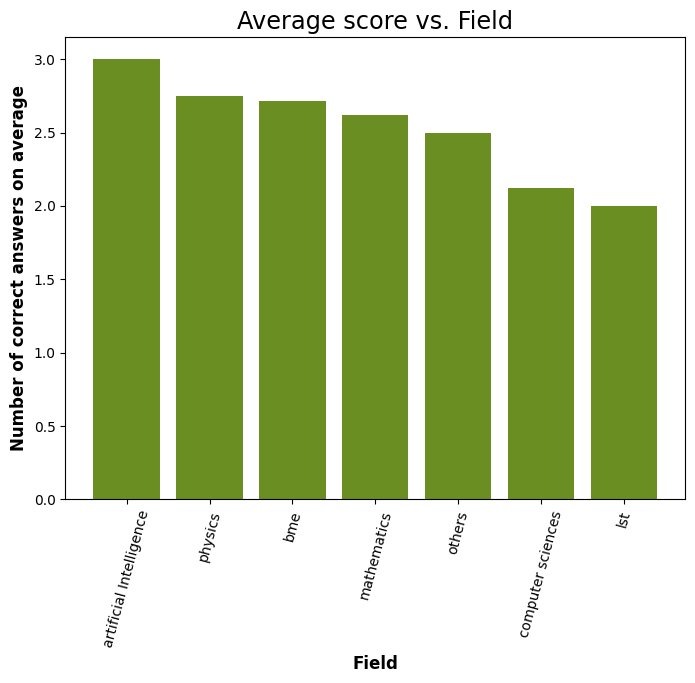

In [ ]:
fig = plt.figure(figsize=(8,6))

study_mean = study_mean.sort_values('correct', ascending=False)

plt.bar(study_mean['field'], study_mean['correct'],color="olivedrab")
plt.title('Average score vs. Field', fontsize="xx-large")
plt.ylabel('Number of correct answers on average', fontsize="large",fontweight="bold")
plt.xlabel('Field', fontsize="large", fontweight="bold")
plt.xticks(rotation=75)

plt.show()

# D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [ ]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest

data = full_dataset['correct']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=2.514, p=0.285
Probably Gaussian


## ANOVA model 1

In [ ]:
# install pingouin as !pip install pingouin. this will be used later for statistical analysis
!pip install pingouin
import pingouin as pg
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# mpl.rcParams['figure.dpi'] = 300
# plt.style.use('seaborn-whitegrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=ce12967e380c318ee11ad56b1820adfad35f76a72029b07b6f069f218ba2b59c
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
dv = 'correct'
iv = 'field'

full_dataset.groupby(iv).mean()

<ipython-input-11-bb48c65aa23c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  full_dataset.groupby(iv).mean()


,correct,incorrect,initial confidence
field,,,
artificial Intelligence,3.000000,2.000000,4.600000
bme,2.714286,2.285714,2.285714
computer sciences,2.125000,2.875000,4.250000
lst,2.000000,3.000000,2.500000
mathematics,2.619048,2.380952,3.428571
others,2.500000,2.500000,3.625000
physics,2.750000,2.250000,2.312500


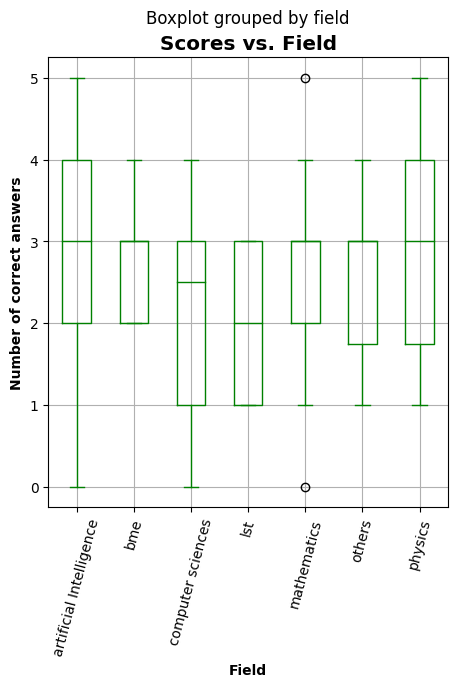

In [ ]:
ax = full_dataset.boxplot(column = dv, by = iv, figsize = (5, 6), grid = True, color="green")

ax.set_xlabel("Field", fontweight="bold", fontsize="medium")
ax.set_ylabel("Number of correct answers", fontweight="bold", fontsize="medium")
ax.set_title("Scores vs. Field", fontweight="bold", fontsize="x-large")

plt.xticks(rotation=75)
plt.show()

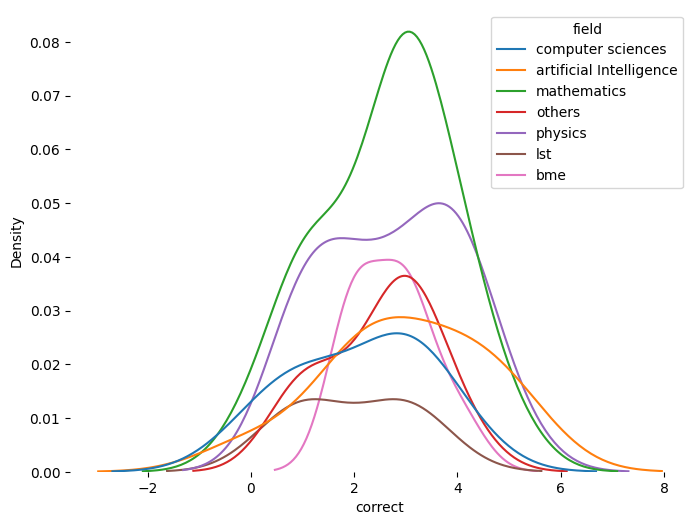

,W,pval,normal
field,,,
computer sciences,0.929593,0.512377,True
artificial Intelligence,0.932670,0.474668,True
mathematics,0.929327,0.133438,True
others,0.859949,0.119935,True
physics,0.888214,0.052200,True
lst,0.728634,0.023857,False
bme,0.833385,0.086137,True


In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.grid(False)
ax.set_frame_on(False)

sns.kdeplot(data = full_dataset, x = dv, hue = iv,
            fill = False, ax = ax)
plt.show()

pg.normality(full_dataset, dv = dv, group = iv, method = 'shapiro')

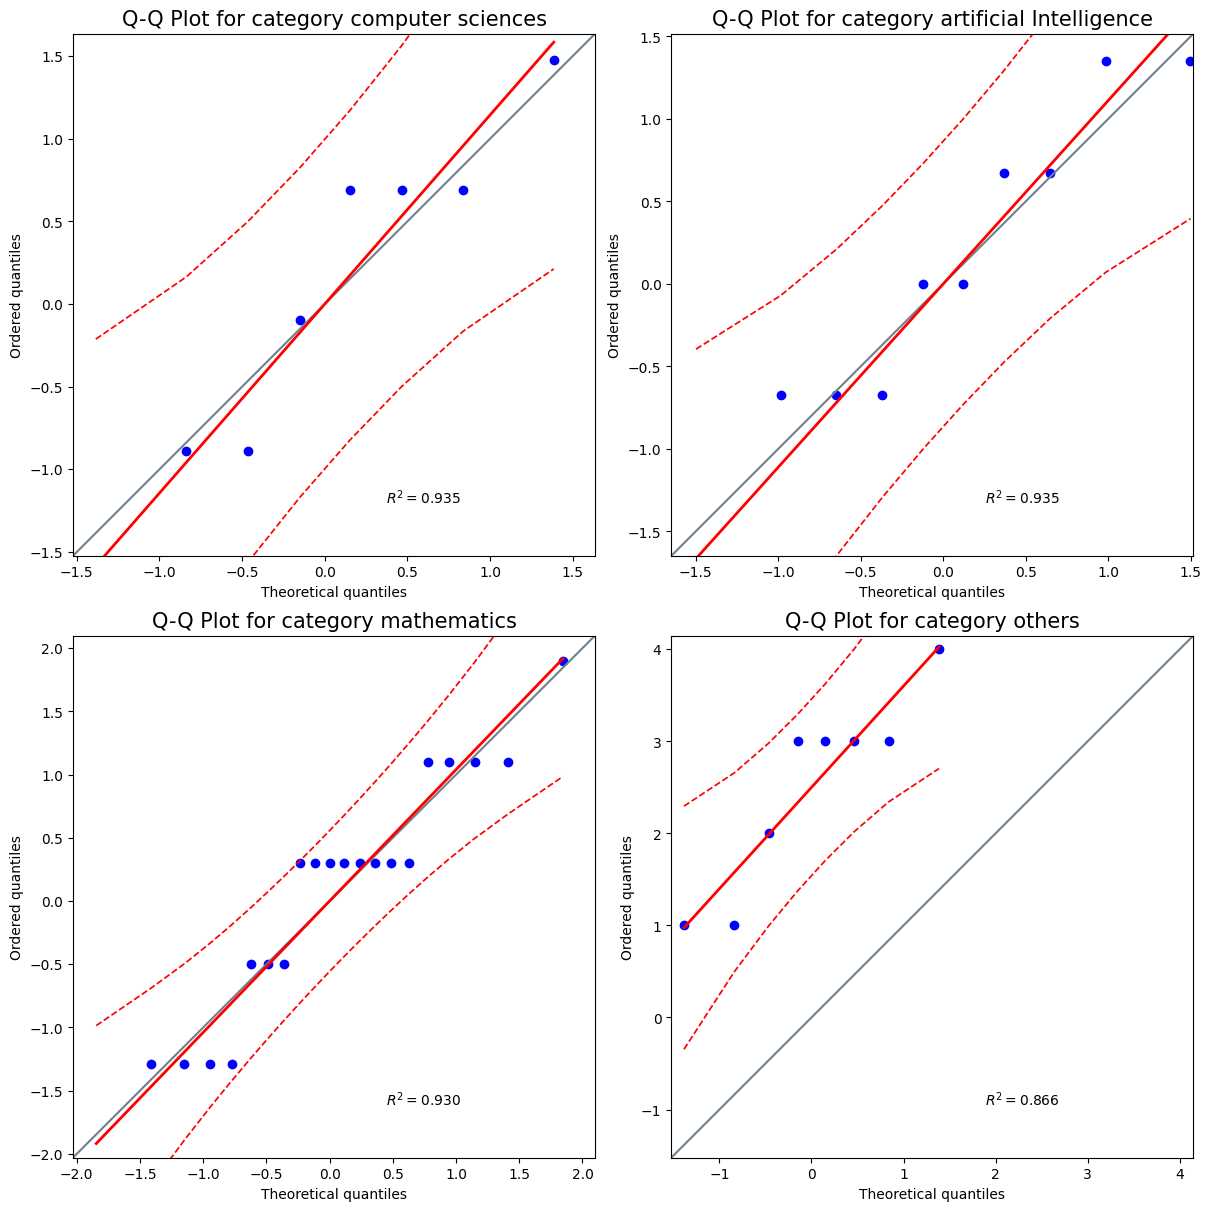

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12),
                         constrained_layout=True)

categories = full_dataset[iv].unique()
for ax, cat in zip(axes.flatten(), categories):
    mask = full_dataset[iv] == cat
    sample = full_dataset.loc[mask, dv]
    pg.qqplot(sample, ax = ax)
    ax.set_title(f"Q-Q Plot for category {cat}", fontsize=15)
    ax.grid(False)

In [ ]:
pg.homoscedasticity(full_dataset, dv = dv, group = iv, method = 'levene')

,W,pval,equal_var
levene,0.667766,0.675885,True


In [ ]:
df_anova = pg.anova(full_dataset, dv = dv, between = iv)
df_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,field,6,67,0.544801,0.772249,0.046519


In [ ]:
df_anova = pg.welch_anova(full_dataset, dv = dv, between = iv)
df_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,field,6,20.247527,0.450857,0.835943,0.046519


In [ ]:
pg.pairwise_gameshowell(full_dataset, dv = dv, between = iv)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,artificial Intelligence,bme,3.000000,2.714286,0.285714,0.571032,0.500348,13.719731,0.998419,0.208282
1,artificial Intelligence,computer sciences,3.000000,2.125000,0.875000,0.688734,1.270446,15.856572,0.855350,0.564445
2,artificial Intelligence,lst,3.000000,2.000000,1.000000,0.760117,1.315587,7.643216,0.827827,0.636002
3,artificial Intelligence,mathematics,3.000000,2.619048,0.380952,0.568245,0.670402,15.008751,0.992458,0.269523
4,artificial Intelligence,others,3.000000,2.500000,0.500000,0.622336,0.803425,15.699370,0.981118,0.347760
5,artificial Intelligence,physics,3.000000,2.750000,0.250000,0.597448,0.418446,17.026546,0.999456,0.169438
6,bme,computer sciences,2.714286,2.125000,0.589286,0.558161,1.055764,11.205277,0.929042,0.495253
7,bme,lst,2.714286,2.000000,0.714286,0.644179,1.108832,4.513951,0.899624,0.718824
8,bme,mathematics,2.714286,2.619048,0.095238,0.400113,0.238028,18.068572,0.999980,0.078167
9,bme,others,2.714286,2.500000,0.214286,0.473804,0.452267,12.517241,0.999076,0.215100


## ANOVA model 2

In [ ]:
# two variables of interest
sample_dataset_1 = full_dataset[['field', 'correct']]
groups = sample_dataset_1.groupby('field').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,field,correct
0,artificial Intelligence,10
1,bme,7
2,computer sciences,8
3,lst,4
4,mathematics,21
5,others,8
6,physics,16


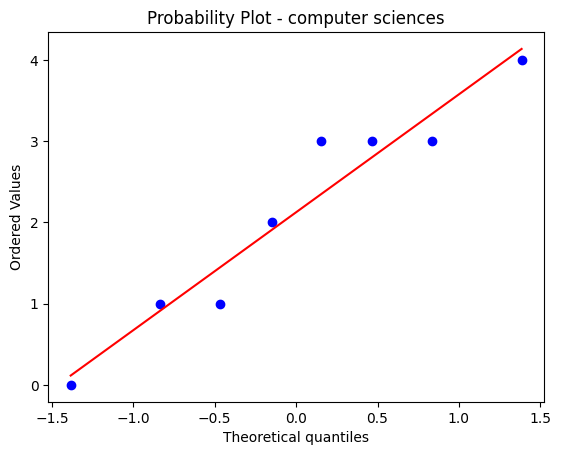

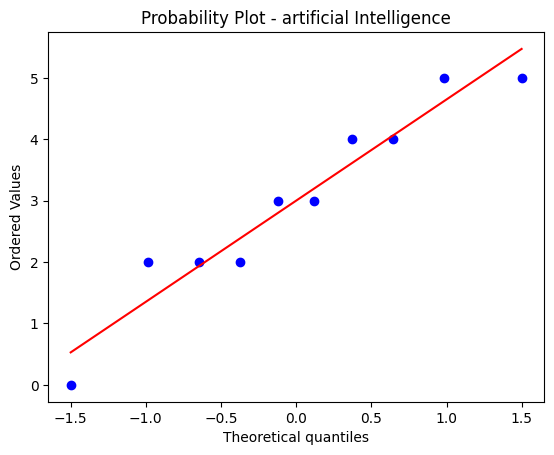

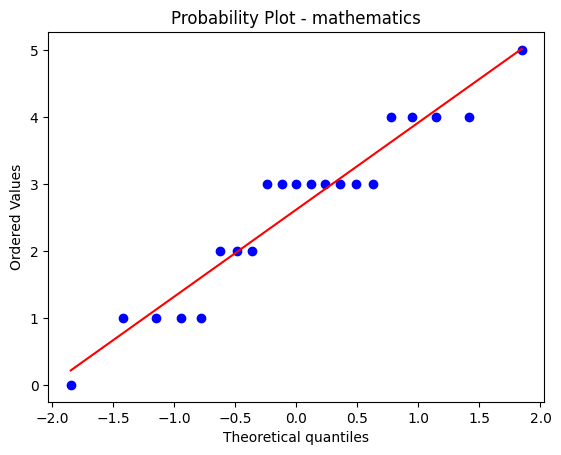

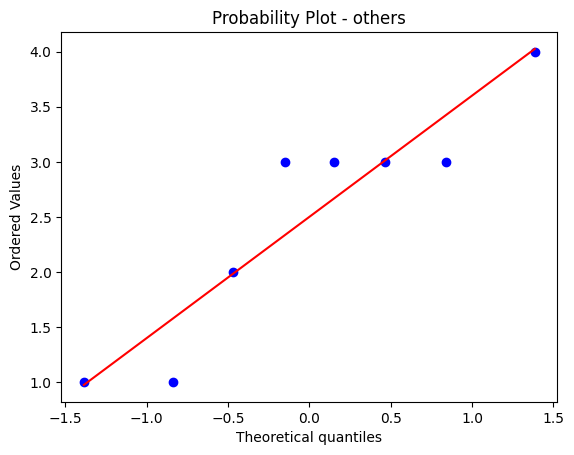

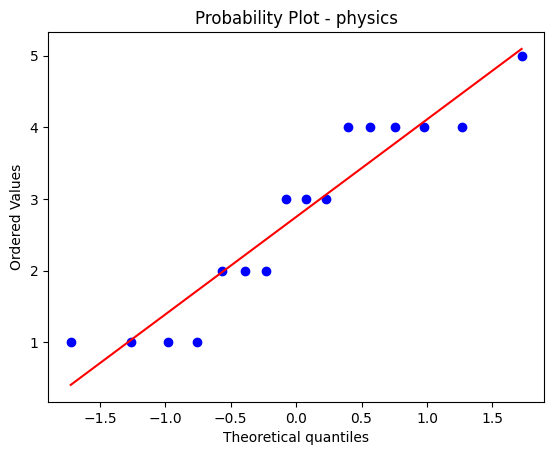

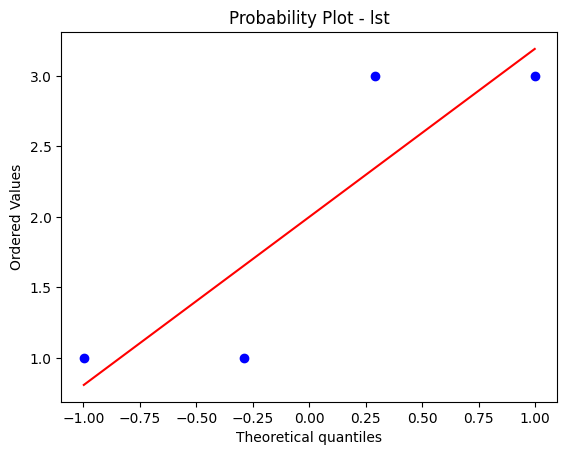

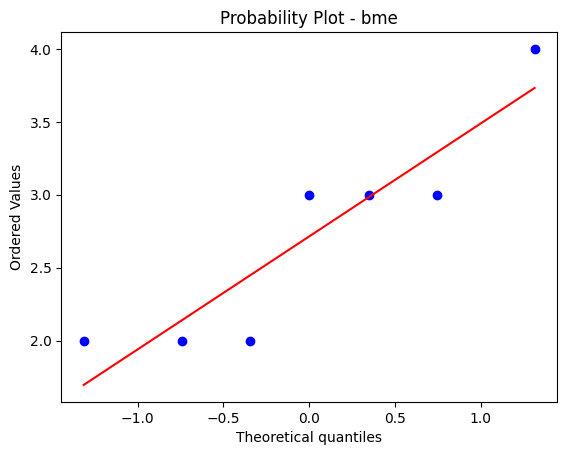

In [ ]:
import scipy.stats as stats
unique_majors = sample_dataset_1['field'].unique()

for major in unique_majors:
    stats.probplot(sample_dataset_1[sample_dataset_1['field'] == major]['correct'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [ ]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = sample_dataset_1.groupby('field').std().max() / sample_dataset_1.groupby('field').std().min()
ratio

correct    2.068279
dtype: float64

In [ ]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_dataset_1['correct'].mean()
SSTR = sample_dataset_1.groupby('field').count() * (sample_dataset_1.groupby('field').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['correct'].sum()

# calculate SSE and update anova table
SSE = (sample_dataset_1.groupby('field').count() - 1) * sample_dataset_1.groupby('field').std()**2
anova_table['SS']['Within Groups'] = SSE['correct'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['correct'].sum() + SSE['correct'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_dataset_1['field'].nunique() - 1
anova_table['df']['Within Groups'] = sample_dataset_1.shape[0] - sample_dataset_1['field'].nunique()
anova_table['df']['Total'] = sample_dataset_1.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.1
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,5.379183,6,0.89653,0.544801,0.772249,2.237312
Within Groups,110.255952,67,1.645611,,,
Total,115.635135,73,1.584043,,,


In [ ]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.5448008879148543  and p value is: 0.7722488764162441
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.5448008879148543  and critical value is: 2.2373121522236623
Failed to reject the null hypothesis.
